# ***MINI PROJECT - BIGMART***


## **Company Overview**
The project focuses on a leading company BIGMART, which has 10 stores in different cities.The data scientists at BigMart have collected 2013 sales data for 1559 products across these stores.
Also, certain attributes of each product and store have been defined.



## **Problem Statement**
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



## *  **Loading Packages and Data**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading train dataset
train_df=pd.read_csv("/content/Train.csv")

In [3]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
# Displaying first few rows of the train data
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




## *   **Exploratory Data Analysis(EDA)**




In [5]:
# Display the dimension of train data
train_df.shape

(8523, 12)

In [6]:
# Displaying information about the data and the datatypes of each respective attribute.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Showing how data has been spread for numerical values
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Checking for duplicate values
train_df.duplicated().sum()

0

In [9]:
# Checking for missing value
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## *Handling missing values*

In [10]:
# Filling missing values in the column "Item_Weight" with the mean value of that column in the train dataset
train_df['Item_Weight'].fillna(value=train_df['Item_Weight'].mean(),inplace=True)

In [11]:
# Filling missing values in the column "Item_Weight" with the mean value of that column in the train dataset
mode_category = train_df['Outlet_Size'].mode().iloc[0]
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(mode_category)

# mode is used to fill categorical values

In [12]:
# Checking whether missing values are filled or not
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64



# *   Univariate Analysis




In [13]:
# 1- Calculate summary statistics for the 'Item_Outlet_Sales' variable in train data

In [14]:
# calculate mean of 'Item_Outlet_Sales'
train_df['Item_Outlet_Sales'].mean()

2181.288913575032

In [15]:
# calculate median of 'Item_Outlet_Sales'
train_df['Item_Outlet_Sales'].median()

1794.331

In [16]:
# calculate standard deviation of 'Item_Outlet_Sales'
train_df['Item_Outlet_Sales'].std()

1706.499615733833

In [17]:
# 2- create frequency table for 'Item_Outlet_Sales'
train_df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [18]:
# 3- create charts

array([[<Axes: title={'center': 'Item_Outlet_Sales'}>]], dtype=object)

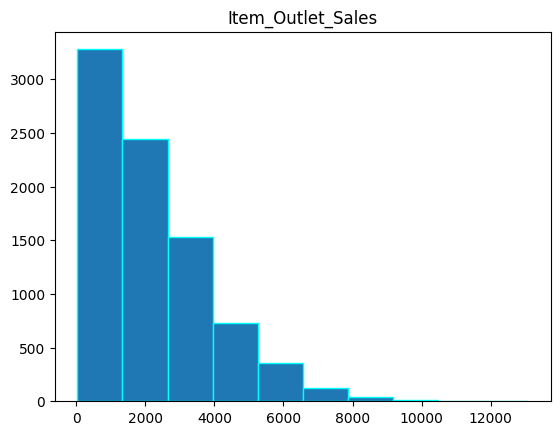

In [19]:
# create a histogram for 'item_outlet_sales'

import matplotlib.pyplot as plt
train_df.hist(column='Item_Outlet_Sales', grid=False, edgecolor='cyan')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

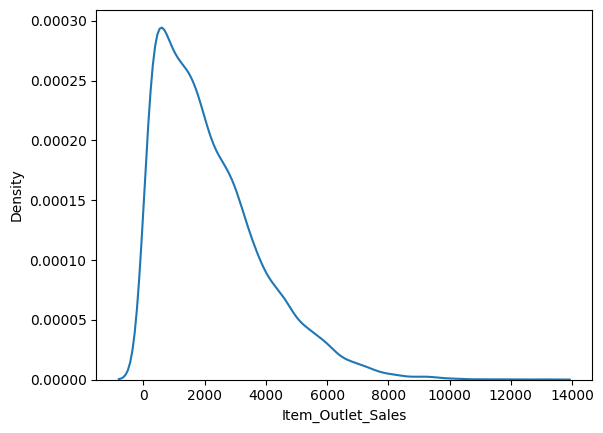

In [20]:
# create a density curve for 'item_outlet_sales'

import seaborn as sns
sns.kdeplot(train_df['Item_Outlet_Sales'])



# *  Bivariate Analysis




In [21]:
#create correlation matrix
train_df.corr()


<ipython-input-21-a4315a2e3435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


## *Visualizations*

<ipython-input-22-a15fa1451e53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


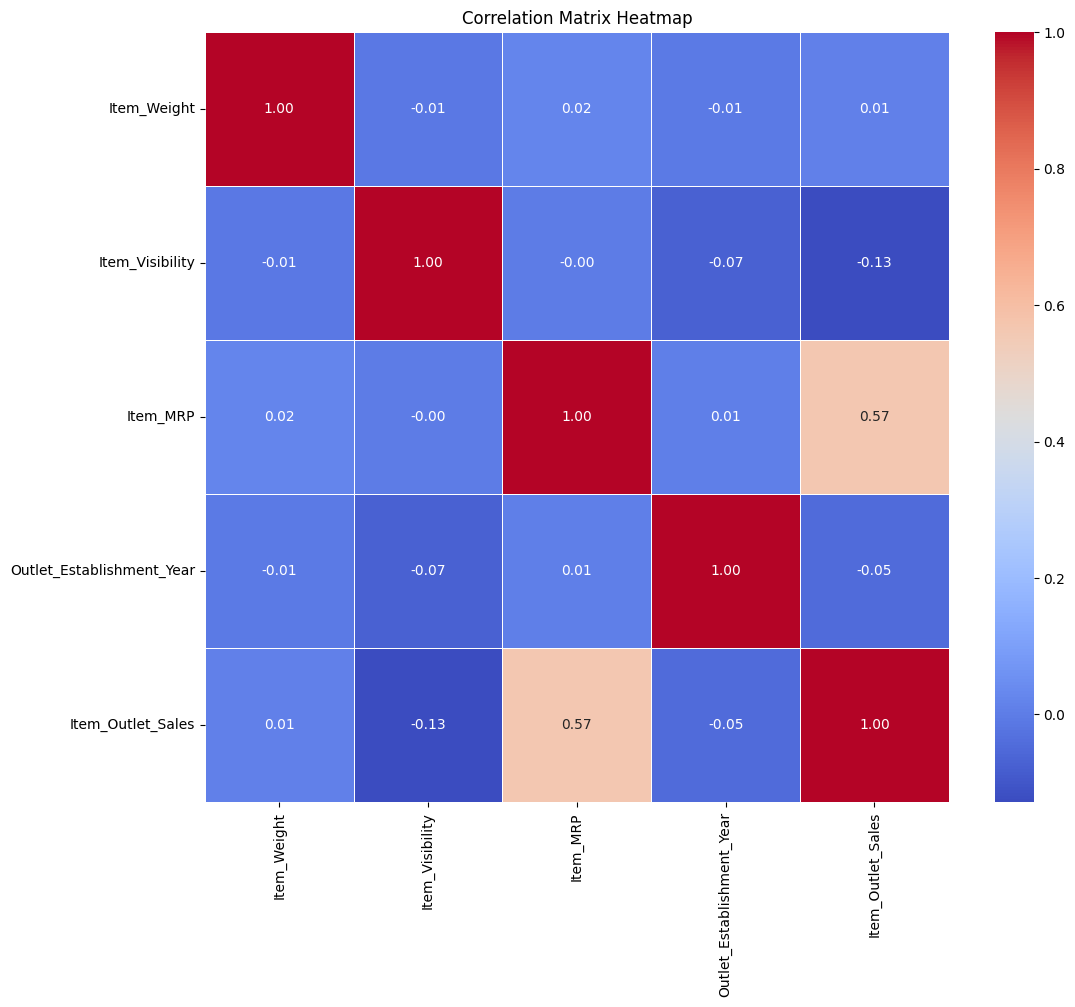

In [22]:
# Plotting Correlation Matrix Heatmap
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## *Correlation Analysis Report for Item_Outlet_Sales*

### *  Positive correlation
        > Item_MRP(0.57) : A good positive correlation is visible between Item_MRP and Item_Outlet_Sales.
### *  Negative correlation
        > Item_Visibility(-0.13) : A negative correlation between Item_Visibility and Item_Outlet_Sales.



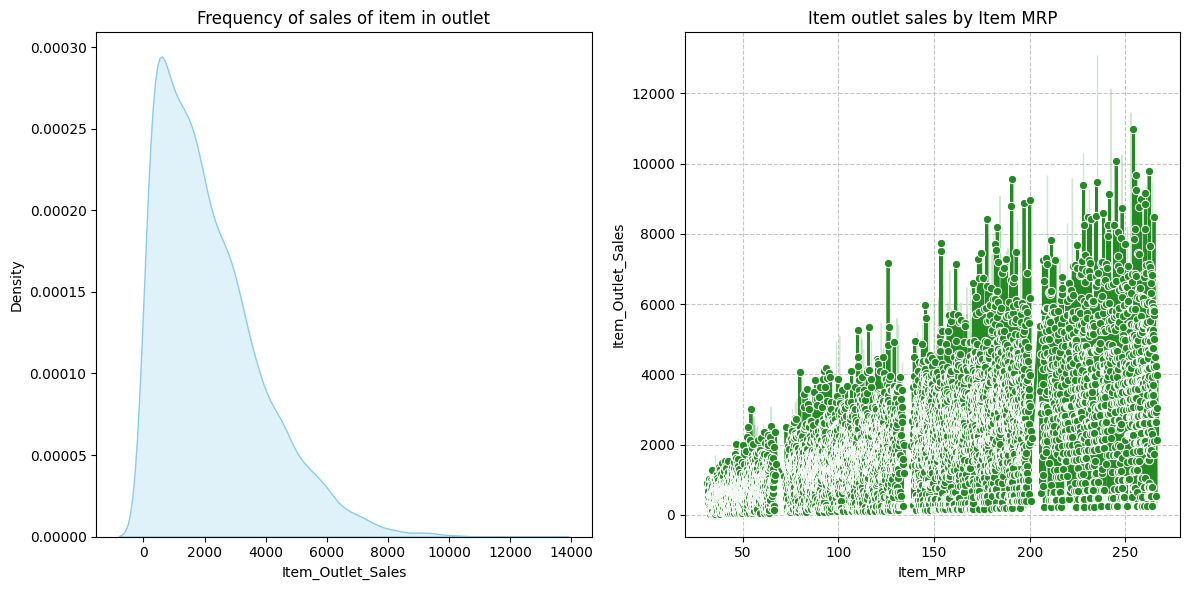

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first KDE plot
sns.kdeplot(data=train_df, x='Item_Outlet_Sales', fill=True, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Item_Outlet_Sales')
axes[0].set_ylabel('Density')
axes[0].set_title('Frequency of sales of item in outlet')

# Plotting the second line plot
sns.lineplot(
    data=train_df, x='Item_MRP', y='Item_Outlet_Sales',
    color='forestgreen', marker='o', linestyle='-', linewidth=2
)
axes[1].set_xlabel('Item_MRP')
axes[1].set_ylabel('Item_Outlet_Sales')
axes[1].set_title('Item outlet sales by Item MRP')

# Add grid to the line plot
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



## *  **Label Encoding**


In [24]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Item_Identifier' column
train_df['Item_Identifier'] = le.fit_transform(train_df['Item_Identifier'])

# Encode 'Item_Fat_Content' column
train_df['Item_Fat_Content'] = le.fit_transform(train_df['Item_Fat_Content'])

# Encode 'Item_Type' column
train_df['Item_Type'] = le.fit_transform(train_df['Item_Type'])

# Encode 'Outlet_Size' column
train_df['Outlet_Size'] = le.fit_transform(train_df['Outlet_Size'])

# Encode 'Outlet_Location_Type' column
train_df['Outlet_Location_Type'] = le.fit_transform(train_df['Outlet_Location_Type'])

# Encode 'Outlet_Type' column
train_df['Outlet_Type'] = le.fit_transform(train_df['Outlet_Type'])

# Encode 'Outlet_Identifier' column
train_df['Outlet_Identifier'] = le.fit_transform(train_df['Outlet_Identifier'])




# * **Modeling**



In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
# Split data into features (X) and labels (y)
X = train_df.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Item Outlet Sale')
    plt.ylabel('Predicted Item Outlet Sale')
    plt.title(f'Actual vs predicted Item Outlet Sale - {model_name}')
    plt.show()

## *Linear Regression*

In [29]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

Linear Regression - MSE: 1291511.9190647847, R-squared: 0.524824818739658


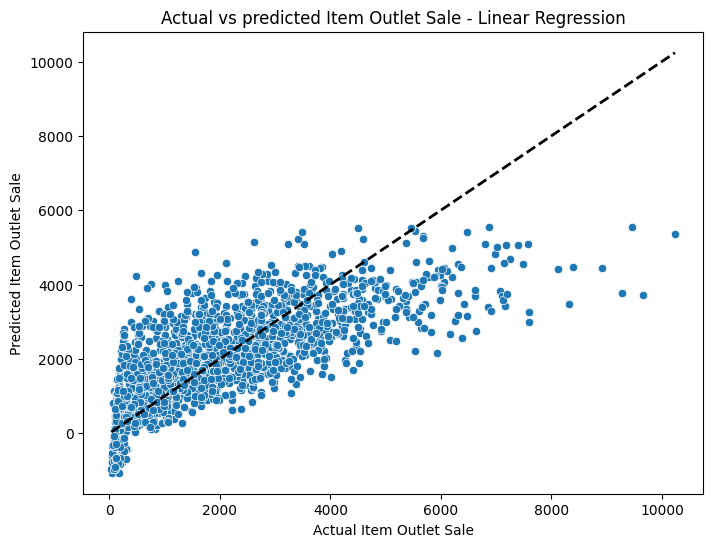

In [30]:
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, linear_reg_predictions)

## *Regularized Linear Regression*

In [31]:
# Initialize and train Regularized Linear Regression model
regularized_linear_reg_model=Ridge()
regularized_linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Regularized Linear Regression model
regularized_linear_reg_predictions = regularized_linear_reg_model.predict(X_test_scaled)
regularized_linear_reg_mse = mean_squared_error(y_test, regularized_linear_reg_predictions)
regularized_linear_reg_r2 = r2_score(y_test, regularized_linear_reg_predictions)
print(f'Regularized Linear Regression - MSE: {regularized_linear_reg_mse}, R-squared: {regularized_linear_reg_r2}')

Regularized Linear Regression - MSE: 1291517.350466311, R-squared: 0.5248228204095098


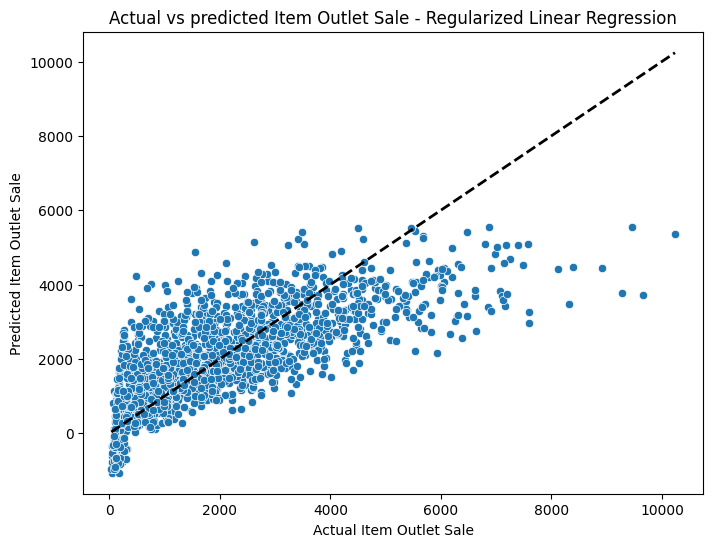

In [32]:
# Scatter plot for Regularized Linear Regression model
scatter_plot('Regularized Linear Regression', y_test, regularized_linear_reg_predictions)

## *Random Forest Model*

In [33]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

Random Forest - MSE: 1195389.3055236496, R-squared: 0.5601904081998785


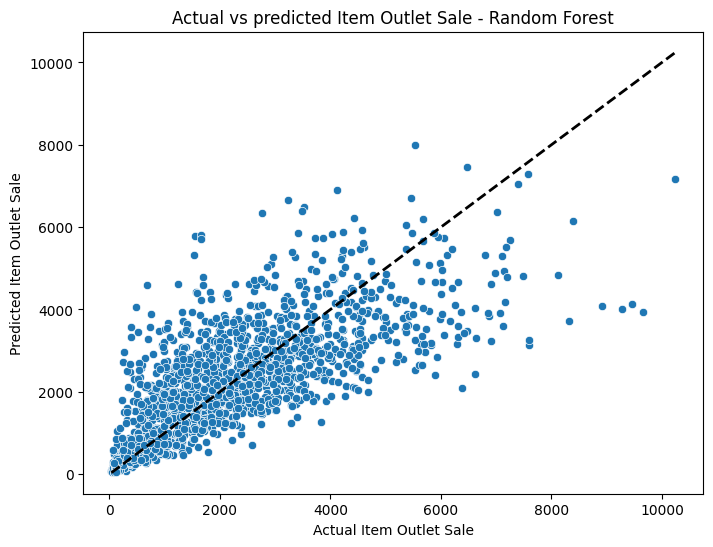

In [34]:
# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

## *XGBoost Model*

In [35]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_test_scaled)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')

XGBoost - MSE: 1297055.4474371846, R-squared: 0.5227852346984326


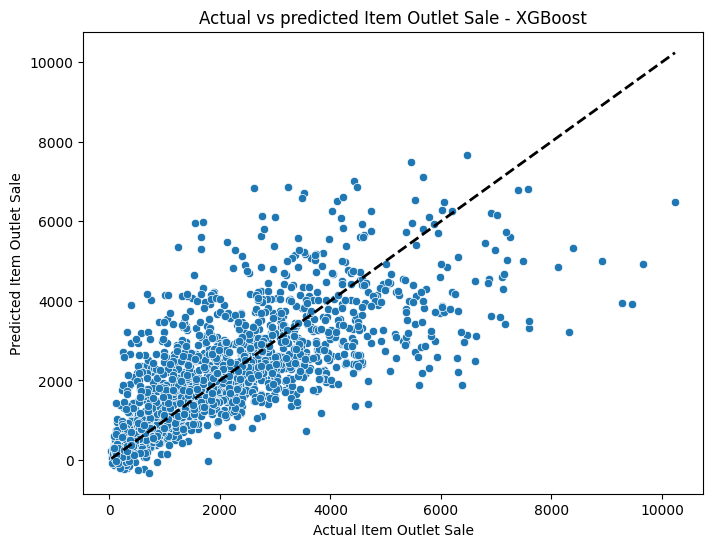

In [36]:
# Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

In [37]:
# Create a DataFrame to store model names, R2 scores and MSE
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Regularized Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [linear_reg_r2, regularized_linear_reg_r2 , random_forest_r2, xgboost_r2],
    'MSE': [linear_reg_mse,regularized_linear_reg_mse , random_forest_mse, xgboost_mse]
})

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest MSE: {best_model['MSE']} and the highest R2 Score: {best_model['R2 Score']}")


Model Comparison:
                           Model  R2 Score           MSE
0              Linear Regression  0.524825  1.291512e+06
1  Regularized Linear Regression  0.524823  1.291517e+06
2                  Random Forest  0.560190  1.195389e+06
3                        XGBoost  0.522785  1.297055e+06

Best Model:
Random Forest has the lowest MSE: 1195389.3055236496 and the highest R2 Score: 0.5601904081998785


# **Summary**
Here it is clear that, Random Forest model is the best predictive model. Comparing to the other 3 models, Random Forest model is showing the highest R squared score and lowest Mean Squared Error.Using this model, BigMart can understand the properties of products and stores which play a key role in increasing sales. This successfully helps to predict sales for BigMart and it provides potential impact on business decisions.